<span style="color:darkolivegreen;font-weight:800;font-size:32px">
    Building Agentic Apps: ArangoDB, NVIDIA cuGraph, and NetworkX Hackathon
</span>

<br>

<p align="center">
    <img src="https://arangodb.com/wp-content/uploads/2016/05/ArangoDB_logo_avocado_@1.png" style="height: 50px;">
    <img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/02-nvidia-logo-color-grn-500x200-4c25-p@2x.png" style="height: 50px;">
    <img src="https://rapids.ai/images/RAPIDS-logo.png" style="height: 50px;">
    <img src="https://avatars.githubusercontent.com/u/388785?s=200&v=4" style="height: 50px;">
</p>

In [1]:
"""
Agentic Graph Querying with LangChain & cuGraph: AQL & GPU-Accelerated Analytics
Logistics Performance Index Graph Analysis
Author: Gift  Ahmed
Date: 1 March 2025
Building Agentic Apps: ArangoDB, NVIDIA cuGraph, and NetworkX Hackathon
"""

'\nAgentic Graph Querying with LangChain & cuGraph: AQL & GPU-Accelerated Analytics\nLogistics Performance Index Graph Analysis\nAuthor: Gift  Ahmed\nDate: 1 March 2025\nBuilding Agentic Apps: ArangoDB, NVIDIA cuGraph, and NetworkX Hackathon\n'

### Step 0: Package Installation & setup

In [2]:
# 1. Install all dependencies using the command below (Uncomment to run):
!pip install pandas networkx matplotlib python-arango==7.3.0 langchain langchain-groq langchain-community langgraph gradio  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72

In [3]:
# 2. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb
!pip install nx-arangodb  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-

In [4]:
# 3. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable
!nvidia-smi
!nvcc --version

Sun Mar  9 02:49:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# 4. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!
!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com  --quiet # Requires CUDA-capable GPU

In [6]:
!pip install cugraph-cu12 --extra-index-url https://pypi.nvidia.com   --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.2 MB/s eta 0:00:00


In [7]:
!pip list | grep cugraph


cugraph-cu12                       25.2.0
libcugraph-cu12                    25.2.0
nx-cugraph-cu12                    25.2.0
pylibcugraph-cu12                  25.2.0


In [8]:
!pip list | grep nx-cugraph-cu12


nx-cugraph-cu12                    25.2.0


In [9]:
import cugraph


In [10]:
# 5. Connect to Google Drive
#
# In this step, we will mount Google Drive to access and store datasets, models,
# and other necessary files. This is particularly useful when working in Google Colab,
# as it allows persistent storage and easy file management.
#
# To proceed, uncomment and run the following command:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [11]:
# Required Libraries:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import nx_arangodb as nxadb
import logging
import networkx.algorithms.community as nx_comm


from tqdm import tqdm
from tqdm.notebook import tqdm
from arango import ArangoClient


# Import LangChain & LangGraph components
from langchain_groq import ChatGroq
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent


[02:49:41 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


In [12]:
# Configure environment
os.environ["ARANGO_HOST"] = "https://5e82a3449bde.arangodb.cloud:8529"
os.environ["ARANGO_USER"] = "root"
os.environ["ARANGO_PASSWORD"] = "root"
os.environ["GROQ_API_KEY"] = "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"  # Replace with your key


In [13]:
# -----------------------------
# Connect to ArangoDB
# -----------------------------
db = ArangoClient(hosts="https://5e82a3449bde.arangodb.cloud:8529").db(username="root", password="root", verify=True)

print("Connected to ArangoDB:", db)

Connected to ArangoDB: <StandardDatabase _system>


### Data cleaning

In [14]:
# Introduction
#
# The dataset used in this project is sourced from the World Bank's Logistics Performance Index (LPI) portal:
# https://databank.worldbank.org/source/logistics-performance-index-(lpi)/Type/TABLE/preview/on#
#
# The data requires cleaning and preprocessing to ensure consistency and accuracy before analysis.
# This includes handling missing values, standardizing formats, and removing any inconsistencies.

file_path = "./drive/My Drive/Hackathon/P_Data_Extract_From_Logistics_Performance_Index_(LPI).xlsx"
xls = pd.ExcelFile(file_path)
# List all sheet names to understand the structure
xls.sheet_names


['Data']

In [15]:
# Load data from Excel
file_path = "./drive/My Drive/Hackathon/P_Data_Extract_From_Logistics_Performance_Index_(LPI).xlsx"
df = pd.read_excel(file_path)
df.head()

,Country Name,Country Code,Series Name,Series Code,2007 [YR2007],2010 [YR2010],2012 [YR2012],2014 [YR2014],2016 [YR2016],2018 [YR2018],2023 [YR2023]
0,Afghanistan,AFG,"Ability to track and trace consignments, rank ...",LP.LPI.TRAC.RK,150,128,146,159,155,159,140
1,Afghanistan,AFG,"Ability to track and trace consignments, score...",LP.LPI.TRAC.XQ,1,2.365503,2.095155,1.847776,1.772402,1.697024,1.6
2,Afghanistan,AFG,"Competence and quality of logistics services, ...",LP.LPI.LOGS.RK,150,141,139,152,139,158,136
3,Afghanistan,AFG,"Competence and quality of logistics services, ...",LP.LPI.LOGS.XQ,1.25,2.090449,2.162592,2.119709,2.145073,1.919246,2
4,Afghanistan,AFG,Ease of arranging competitively priced interna...,LP.LPI.ITRN.RK,150,141,134,156,125,152,139


In [16]:
# Define the years to extract
years = ["2007 [YR2007]", "2010 [YR2010]", "2012 [YR2012]",
         "2014 [YR2014]", "2016 [YR2016]", "2018 [YR2018]", "2023 [YR2023]"]

# Reshape data from wide format to long format
df_melted = df.melt(id_vars=["Country Name", "Country Code", "Series Code", "Series Name"],
                    value_vars=years,
                    var_name="Year",
                    value_name="Value")

# Extract numeric year
df_melted["Year"] = df_melted["Year"].str.extract(r"(\d{4})").astype(int)

# Convert invalid numeric values ('..') to NaN
df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce")

# Drop missing values
df_melted.dropna(inplace=True)

# Pivot the table to get required format
df_pivot = df_melted.pivot_table(index=["Country Name", "Country Code", "Year"],
                                 columns="Series Name",
                                 values="Value",
                                 aggfunc="mean").reset_index()

# Rename columns to match the required format
df_pivot.rename(columns={
    "Country Name": "Country",
    "Country Code": "Country Code",
    "Ability to track and trace consignments, rank (1=highest performer)": "Tracking and Tracing Rank",
    "Ability to track and trace consignments, score (1=low to 5=high)": "Tracking and Tracing Score",
    "Competence and quality of logistics services, rank (1=highest performer)": "Logistics Competence Rank",
    "Competence and quality of logistics services, score (1=low to 5=high)": "Logistics Competence Score",
    "Ease of arranging competitively priced international shipments, rank (1=highest performer)": "International Shipments Rank",
    "Ease of arranging competitively priced international shipments, score (1=low to 5=high)": "International Shipments Score",
    "Efficiency of the clearance process, rank (1=highest performer)": "Customs Rank",
    "Efficiency of the clearance process, score (1=low to 5=high)": "Customs Score",
    "Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)": "On-Time Shipments Rank",
    "Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)": "On-Time Shipments Score",
    "Logistics performance index: Overall rank (1=highest performance)": "LPI Rank",
    "Logistics performance index: Overall rank (1=highest performance), lower bound": "LPI Rank Lower Bound",
    "Logistics performance index: Overall rank (1=highest performance), upper bound": "LPI Rank Upper Bound",
    "Logistics performance index: Overall score (1=low to 5=high)": "LPI Score",
    "Logistics performance index: Overall score (1=low to 5=high), lower bound": "LPI Score Lower Bound",
    "Logistics performance index: Overall score (1=low to 5=high), upper bound": "LPI Score Upper Bound",
    "Logistics performance index: Percent of highest performer)": "LPI Percent of Highest Performer",
    "Quality of trade- and transport-related infrastructure, rank (1=highest performer)": "Infrastructure Rank",
    "Quality of trade- and transport-related infrastructure, score (1=low to 5=high)": "Infrastructure Score"
}, inplace=True)



In [17]:
# Save the transformed data
output_file = "./drive/My Drive/Hackathon/lpi_data_transformed.xlsx"
df_pivot.to_excel(output_file, sheet_name="LPI_Data", index=False)

print(f"✅ Data formatted and saved in '{output_file}' successfully!")


✅ Data formatted and saved in './drive/My Drive/Hackathon/lpi_data_transformed.xlsx' successfully!


### Step 1: Choose & prepare your dataset for NetworkX

### Loading  the Cleaned Data

In [18]:
# -----------------------------
#  Load Cleaned Data
# -----------------------------
file_path = "./drive/My Drive/Hackathon/lpi_data_transformed.xlsx"
df = pd.read_excel(file_path)
print("Dataset loaded Head:")
display(df.head())

Dataset loaded Head:


,Country,Country Code,Year,Tracking and Tracing Rank,Tracking and Tracing Score,Logistics Competence Rank,Logistics Competence Score,International Shipments Rank,International Shipments Score,Customs Rank,...,On-Time Shipments Score,LPI Rank,LPI Rank Lower Bound,LPI Rank Upper Bound,LPI Score,LPI Score Lower Bound,LPI Score Upper Bound,LPI Percent of Highest Performer,Infrastructure Score,"Quality- of trade and transport-related infrastructure, rank (1=highest performer)"
0,Afghanistan,AFG,2007,150,1.000000,150,1.250000,150,1.222220,150,...,1.375000,150,NaN,NaN,1.211669,NaN,NaN,6.634704,1.100000,150
1,Afghanistan,AFG,2010,128,2.365503,141,2.090449,141,2.244916,104,...,2.605503,143,122.0,150.0,2.243160,2.062171,2.424148,39.915876,1.873596,139
2,Afghanistan,AFG,2012,146,2.095155,139,2.162592,134,2.332182,99,...,2.795259,135,117.0,146.0,2.297272,2.129420,2.465124,41.501907,2.003611,141
3,Afghanistan,AFG,2014,159,1.847776,152,2.119709,156,1.986686,137,...,2.482138,158,153.0,158.0,2.069573,1.974845,2.164301,34.259411,1.818951,158
4,Afghanistan,AFG,2016,155,1.772402,139,2.145073,125,2.375026,138,...,2.611203,150,137.0,155.0,2.141282,2.017525,2.265038,35.377981,1.835473,154


### Step 2: Convert and Load Graph Data into NetworkX

In [19]:
# In this step, we select a dataset that is suitable for graph-based analysis using NetworkX.
# The dataset needs to be structured in a way that allows the representation of entities (nodes)
# and their relationships (edges).

In [20]:
# Initialize NetworkX Graph
G = nx.MultiDiGraph (name="LPI_Graph")

# Function to clean missing values
def clean_data(value):
    return None if pd.isna(value) or value is np.nan else value

# Standardize column names to avoid errors
df.columns = df.columns.str.strip()
column_mapping = {
    "Quality- of trade and transport-related infrastructure, rank (1=highest performer)": "Infrastructure_Rank"
}
df.rename(columns=column_mapping, inplace=True)

# Add nodes and edges
for _, row in tqdm(df.iterrows(), total=len(df), desc="Building graph"):
    country = clean_data(row["Country"])
    year = str(clean_data(row["Year"]))

    if not country or not year:
        continue

    # Add Country Node with attributes
    G.add_node(
        country,
        type="Country",
        Country_Name=country,
        Year = year,
        Country_Code=clean_data(row.get("Country Code")),
        LPI_Score=clean_data(row.get("LPI Score")),
        LPI_Rank=clean_data(row.get("LPI Rank")),
        LPI_Score_Lower_Bound=clean_data(row.get("LPI Score Lower Bound")),
        LPI_Score_Upper_Bound=clean_data(row.get("LPI Score Upper Bound")),
        Customs_Score=clean_data(row.get("Customs Score")),
        Customs_Rank=clean_data(row.get("Customs Rank")),
        Infrastructure_Score=clean_data(row.get("Infrastructure Score")),
        Infrastructure_Rank=clean_data(row.get("Infrastructure_Rank")),
        International_Shipments_Score=clean_data(row.get("International Shipments Score")),
        International_Shipments_Rank=clean_data(row.get("International Shipments Rank")),
        Logistics_Competence_Score=clean_data(row.get("Logistics Competence Score")),
        Logistics_Competence_Rank=clean_data(row.get("Logistics Competence Rank")),
        Tracking_and_Tracing_Score=clean_data(row.get("Tracking and Tracing Score")),
        Tracking_and_Tracing_Rank=clean_data(row.get("Tracking and Tracing Rank")),
        On_Time_Shipments_Score=clean_data(row.get("On-Time Shipments Score")),
        On_Time_Shipments_Rank=clean_data(row.get("On-Time Shipments Rank")),
        LPI_Percent_Highest_Performer=clean_data(row.get("LPI Percent of Highest Performer")),
    )

    # Add Year Node
    G.add_node(year, type="Year")

    # Add Edge (Relationship)
    G.add_edge(
        country,
        year,
        relationship="Year",
        lpi_score=clean_data(row.get("LPI Score")),
        lpi_rank=clean_data(row.get("LPI Rank"))
    )

# Debugging Output
print("Before persisting:")
print(f"Nodes in NetworkX: {len(G.nodes)}")
print(f"Edges in NetworkX: {len(G.edges)}")


Building graph:   0%|          | 0/1079 [00:00<?, ?it/s]

Before persisting:
Nodes in NetworkX: 177
Edges in NetworkX: 1079


Text(0.5, 1.0, 'Full Logistics Performance Index (LPI) Graph Visualization')

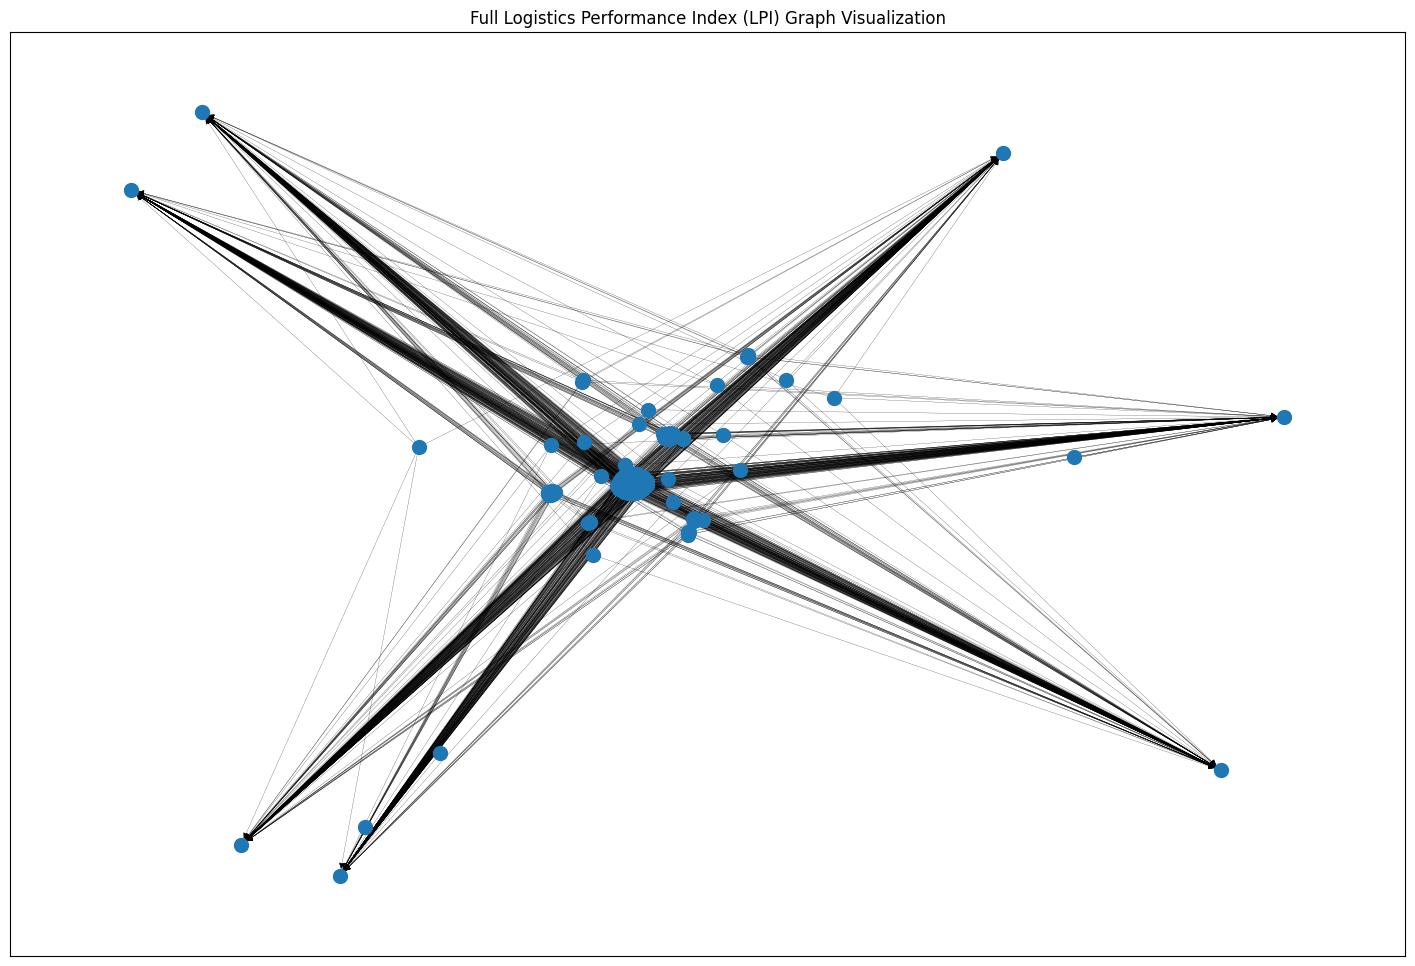

In [21]:
# Visualize the Graph
plot_options = {"node_size": 100, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=30, seed=42)
fig, ax = plt.subplots(figsize=(18, 12))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.title("Full Logistics Performance Index (LPI) Graph Visualization")

Text(0.5, 1.0, 'Full Logistics Performance Index (LPI) Graph Visualization')

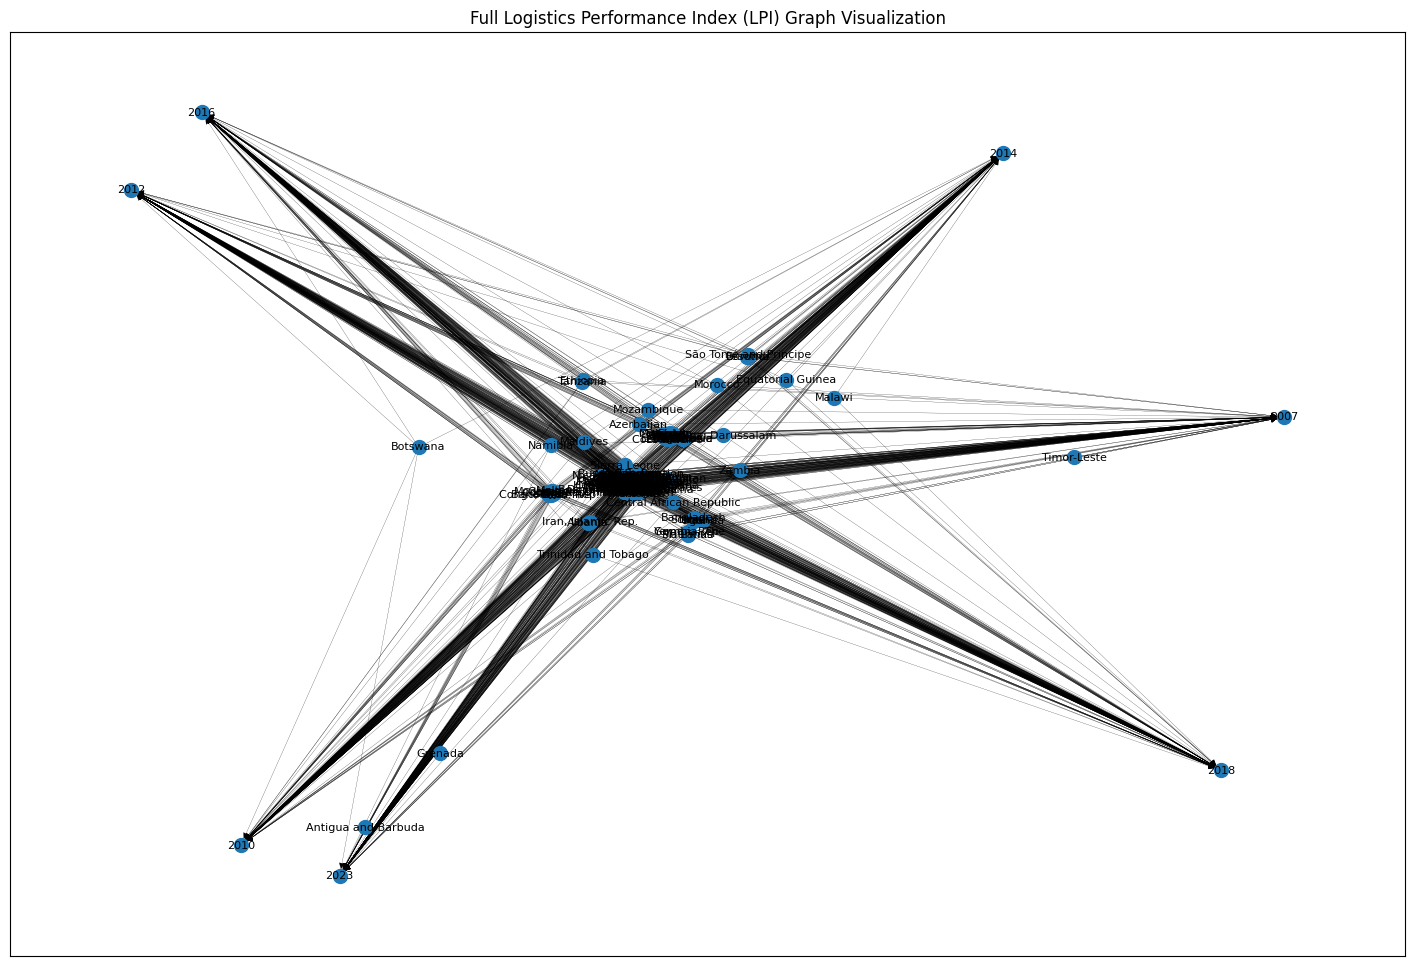

In [22]:
# Visualize the Graph
plot_options = {"node_size": 100, "with_labels": True, "width": 0.15}
pos = nx.spring_layout(G, iterations=30, seed=42)
fig, ax = plt.subplots(figsize=(18, 12))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options, font_size=8)
plt.title("Full Logistics Performance Index (LPI) Graph Visualization")

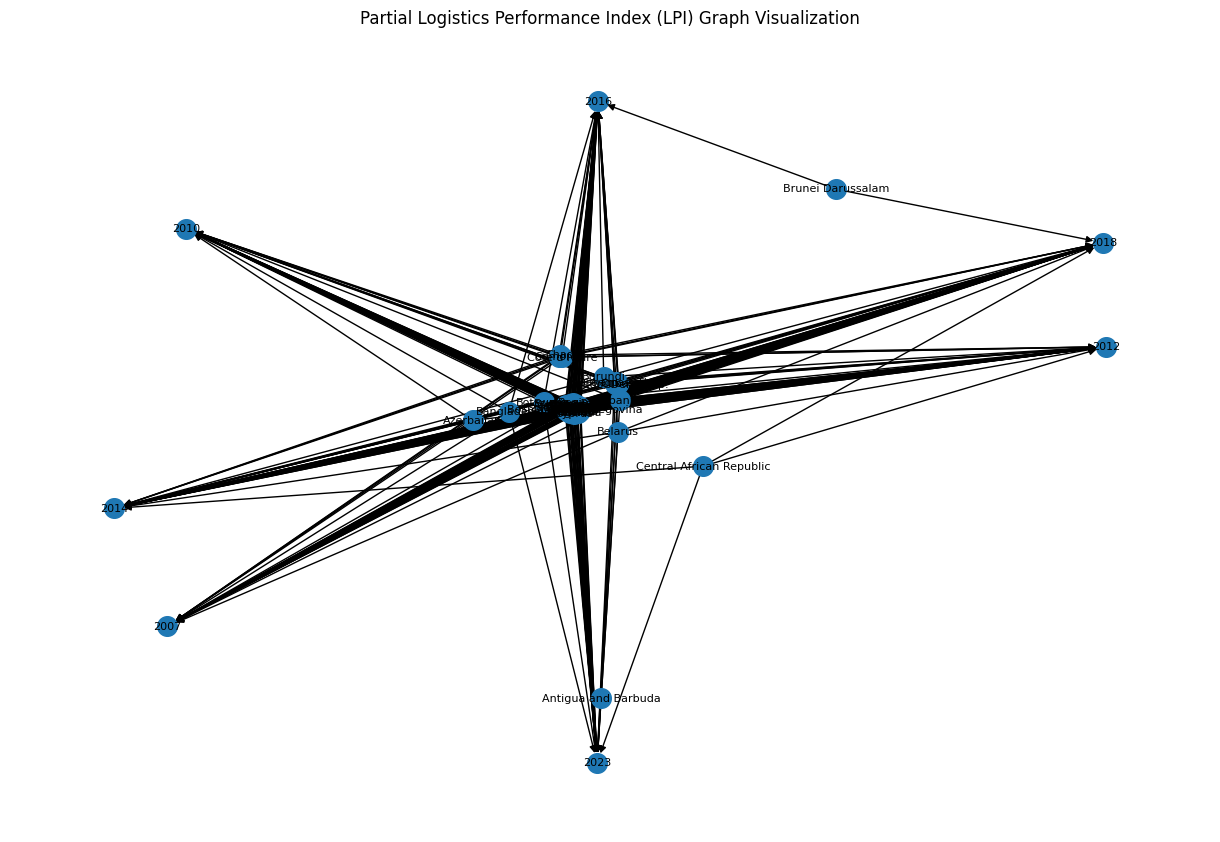

In [23]:
# Visualize subset
plt.figure(figsize=(12,8))
subgraph = G.subgraph(list(G.nodes)[:50])
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=200, font_size=8)
plt.title("Partial Logistics Performance Index (LPI) Graph Visualization")
plt.show()

In [24]:
!pip install  pyvis  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00


In [25]:
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G)
net.show("./drive/My Drive/Hackathon/lpi_graph.html")


./drive/My Drive/Hackathon/lpi_graph.html


### Step 3: Persist the Graph in ArangoDB

In [26]:
# -----------------------------
# Step 3: Persist/Connect the Graph in ArangoDB
# -----------------------------
G_adb = nxadb.MultiDiGraph(
    name="LPI_Graph",
    db=db,
    incoming_graph_data=G,
    write_batch_size=1000,
    overwrite_graph=True
)

print(f"Graph persisted in collection: {G_adb.name}")


[02:50:19 +0000] [INFO]: Overwriting graph 'LPI_Graph'
INFO:nx_arangodb:Overwriting graph 'LPI_Graph'
[02:50:19 +0000] [INFO]: Graph 'LPI_Graph' exists.
INFO:nx_arangodb:Graph 'LPI_Graph' exists.
[02:50:19 +0000] [INFO]: Default node type set to 'LPI_Graph_node'
INFO:nx_arangodb:Default node type set to 'LPI_Graph_node'
[2025/03/09 02:50:19 +0000] [132] [INFO] - adbnx_adapter: Instantiated ADBNX_Adapter with database '_system'
INFO:adbnx_adapter:Instantiated ADBNX_Adapter with database '_system'


Output()

Output()

[2025/03/09 02:50:19 +0000] [132] [INFO] - adbnx_adapter: Created ArangoDB 'LPI_Graph' Graph
INFO:adbnx_adapter:Created ArangoDB 'LPI_Graph' Graph


Graph persisted in collection: LPI_Graph


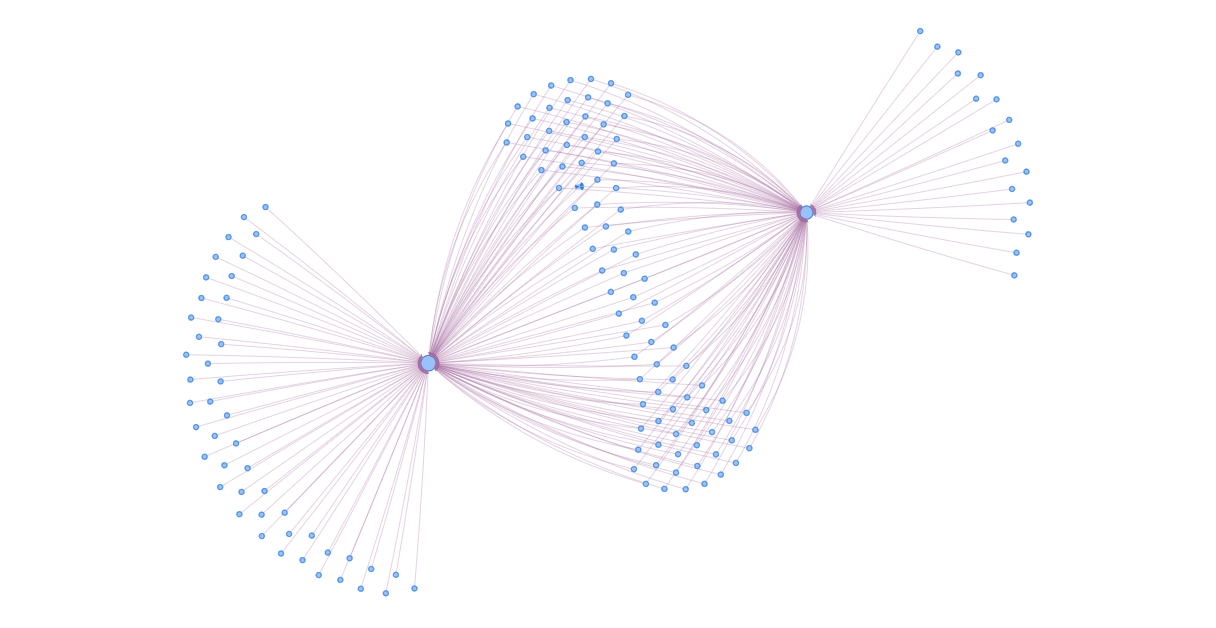

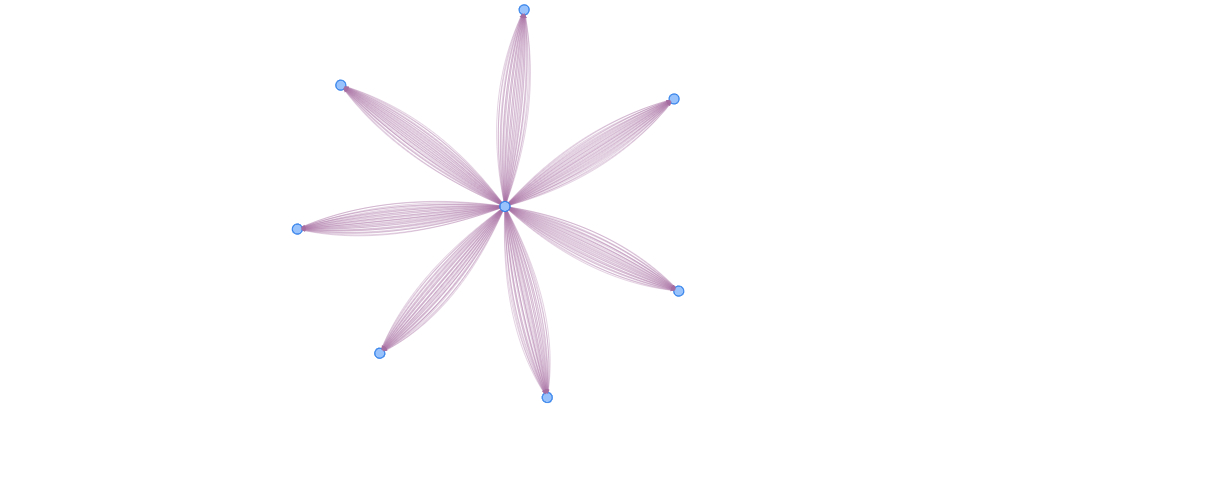

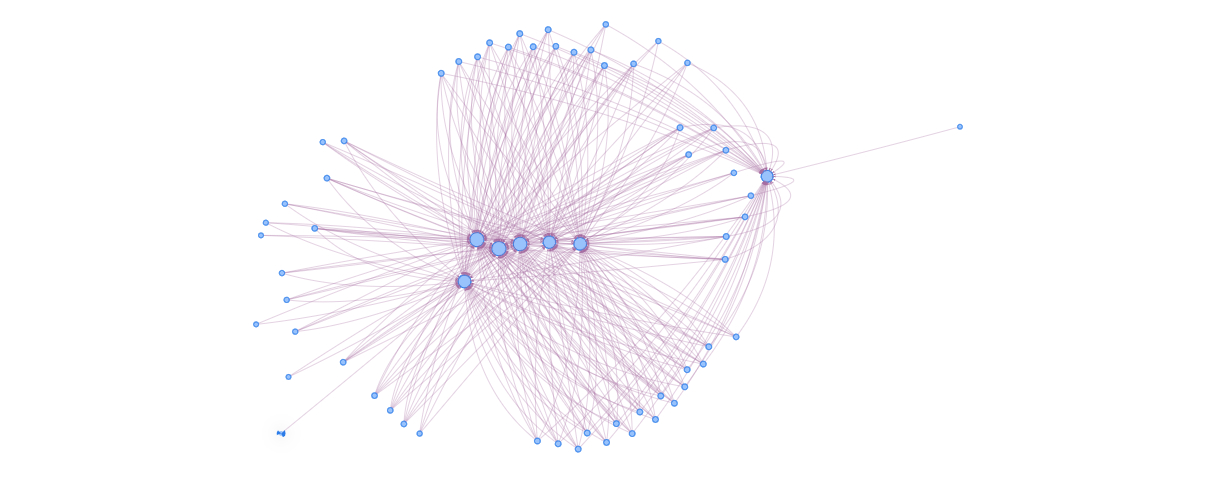

In [27]:
# Query a sample of nodes
result = G_adb.query("""
    FOR node IN LPI_Graph_node
        SORT RAND()
        LIMIT 5
        RETURN node
""")
print(list(result))

# Query a sample of edges
result = G_adb.query("""
    FOR edge IN LPI_Graph_node_to_LPI_Graph_node
        SORT RAND()
        LIMIT 5
        RETURN edge
""")
print(list(result))


[{'_key': '39', '_id': 'LPI_Graph_node/39', '_rev': '_jVhNdwy--l', 'type': 'Country', 'Country_Name': 'Colombia', 'Year': '2023', 'Country_Code': 'COL', 'LPI_Score': 2.9, 'LPI_Rank': 66, 'LPI_Score_Lower_Bound': None, 'LPI_Score_Upper_Bound': None, 'Customs_Score': 2.5, 'Customs_Rank': 84, 'Infrastructure_Score': 2.9, 'Infrastructure_Rank': 59, 'International_Shipments_Score': 3, 'International_Shipments_Rank': 57, 'Logistics_Competence_Score': 3.1, 'Logistics_Competence_Rank': 57, 'Tracking_and_Tracing_Score': 3.1, 'Tracking_and_Tracing_Rank': 62, 'On_Time_Shipments_Score': 3.2, 'On_Time_Shipments_Rank': 65, 'LPI_Percent_Highest_Performer': None, 'size': 10}, {'_key': '16', '_id': 'LPI_Graph_node/16', '_rev': '_jVhNdwy--O', 'type': 'Country', 'Country_Name': 'Azerbaijan', 'Year': '2014', 'Country_Code': 'AZE', 'LPI_Score': 2.448376, 'LPI_Rank': 125, 'LPI_Score_Lower_Bound': 2.146846, 'LPI_Score_Upper_Bound': 2.749907, 'Customs_Score': 2.571429, 'Customs_Rank': 82, 'Infrastructure_Scor

In [28]:
degree_centrality = nx.degree_centrality(G)
top_countries = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Most Connected Countries by Logistics Activity:")
print(top_countries)


Top 10 Most Connected Countries by Logistics Activity:
[('2014', 0.9090909090909092), ('2016', 0.9090909090909092), ('2018', 0.9090909090909092), ('2010', 0.8806818181818182), ('2012', 0.8806818181818182), ('2007', 0.8522727272727273), ('2023', 0.7897727272727273), ('Afghanistan', 0.03977272727272727), ('Algeria', 0.03977272727272727), ('Angola', 0.03977272727272727)]


In [29]:
# Compute communities using Louvain method
from networkx.algorithms import community
communities = community.louvain_communities(G, weight="LPI Score")
print(f"Found {len(communities)} clusters of countries.")


Found 3 clusters of countries.


In [30]:
# Compute communities using Louvain method
communities = community.louvain_communities(G, weight="LPI Score")

print(f"Found {len(communities)} clusters of countries.")
for idx, comm in enumerate(communities, start=1):
    # Convert set to sorted list for consistent ordering
    community_list = sorted(list(comm))
    print(f"Cluster {idx}: {community_list}")


Found 3 clusters of countries.
Cluster 1: ['2007', '2012', '2014', 'Azerbaijan', 'Belarus', 'Burundi', 'Central African Republic', 'Chad', 'Comoros', "Cote d'Ivoire", 'Ecuador', 'Eritrea', 'Ethiopia', 'Gambia, The', 'Jordan', 'Kenya', 'Lebanon', 'Lesotho', 'Malawi', 'Mauritania', 'Mauritius', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Pakistan', 'Senegal', 'Sri Lanka', 'São Tomé and Principe', 'Tanzania', 'Timor-Leste', 'Tunisia', 'Yemen, Rep.', 'Zimbabwe']
Cluster 2: ['2016', '2018', 'Brunei Darussalam', 'Equatorial Guinea', 'Maldives', 'Morocco', 'Sierra Leone', 'Trinidad and Tobago', 'Turkmenistan', 'Uganda', 'Zambia']
Cluster 3: ['2010', '2023', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'C

### Step 4: Build the Agentic App with LangChain & LangGraph

In [31]:
# Create an ArangoGraph object for LangChain queries.
from langchain_community.graphs import ArangoGraph
arango_graph = ArangoGraph(db)

# Rebuild a NetworkX graph from ArangoDB (for query analytics)
G_adb_from_arango = nx.Graph()
for node in arango_graph.query("FOR doc IN LPI_Graph_node RETURN doc"):
    G_adb_from_arango.add_node(node["_id"], **node)
print("Rebuilt NetworkX graph from ArangoDB has", G_adb_from_arango.number_of_nodes(), "nodes.")

Rebuilt NetworkX graph from ArangoDB has 177 nodes.


In [32]:
from contextlib import contextmanager

@contextmanager
def gpu_acceleration():
    """Context manager for GPU resource monitoring"""
    try:
        import torch
        if torch.cuda.is_available():
            torch.cuda.init()
            yield "cuda"
        else:
            yield "cpu"
    except ImportError:
        yield "cpu"

# Usage in analytics tools
with gpu_acceleration() as device:
    print(f"Running analytics on {device}")

Running analytics on cuda


In [33]:
# -----------------------------
# Step 4: Build the Agentic App for Querying the Graph
# -----------------------------


# Tool 1: Groq-based AQL Tool (for simple, dynamic queries)
@tool
def text_to_aql_to_text(query: str):
    """
    Converts a natural language query into AQL, executes it in ArangoDB,
    and returns the result in natural language.
    Optimized for querying LPI data (2007 to 2023).
    """
    chain = ArangoGraphQAChain.from_llm(
        llm=ChatGroq(temperature=0, model_name="llama3-70b-8192"),
        graph=arango_graph,
        verbose=True,
        allow_dangerous_requests=True,
    )
    result = chain.invoke(query)
    return str(result["result"])

In [34]:
# Configure detailed logging.
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [35]:
# Tool 1: SIMPLE QUERIES using Dynamic AQL
@tool
def text_to_aql_to_text(query: str):
    """
    Converts a natural language query into AQL, executes it in ArangoDB,
    and returns the result in natural language.
    Optimized for querying LPI data (2007 to 2023).
    """
    chain = ArangoGraphQAChain.from_llm(
        llm=ChatGroq(temperature=0, model_name="llama3-70b-8192"),
        graph=arango_graph,
        verbose=True,
        allow_dangerous_requests=True,
    )
    result = chain.invoke(query)
    return str(result["result"])

# Tool 2: COMPLEX QUERIES using GPU-Accelerated Graph Analytics (NetworkX/cuGraph)
def convert_to_standard_graph(G):
    """
    Convert G to a standard NetworkX graph.
    This is useful if G is of a custom type.
    """
    try:
        return nx.Graph(G)
    except Exception as e:
        logging.warning("Conversion to standard graph failed: %s", e)
        return G

def compute_pagerank():
    """
    Computes PageRank on G_adb using cuGraph if possible, else falls back to NetworkX.
    Returns a concise string with the most influential node.
    """
    try:
        try:
            import cugraph
            logging.info("cuGraph available; computing PageRank with GPU acceleration.")
            pr_df = cugraph.pagerank(G_adb)
            # Expect pr_df to be a DataFrame with columns 'vertex' and 'pagerank'
            influential_row = pr_df.sort_values("pagerank", ascending=False).iloc[0]
            influential_node = influential_row["vertex"]
            score = influential_row["pagerank"]
        except Exception as gpu_error:
            logging.warning("cuGraph PageRank failed (%s); falling back to NetworkX.", gpu_error)
            standard_G = convert_to_standard_graph(G_adb)
            pr = nx.pagerank(standard_G)
            influential_node = max(pr, key=pr.get)
            score = pr[influential_node]
        return f"The most influential node is {influential_node} with a PageRank score of {score:.4f}."
    except Exception as e:
        logging.error("Error in PageRank safe path: %s", e)
        return f"Error computing PageRank: {e}"

def compute_communities():
    """
    Computes communities using cuGraph (Louvain) if possible, else falls back to NetworkX.
    Returns a concise string with the largest community details.
    """
    try:
        try:
            import cugraph
            logging.info("cuGraph available; computing communities using Louvain method.")
            communities_df = cugraph.louvain(G_adb)
            community_counts = communities_df["partition"].value_counts()
            top_community = community_counts.idxmax()
            count = community_counts.max()
            return f"Top community: partition {top_community} with {count} nodes."
        except Exception as gpu_error:
            logging.warning("cuGraph community detection failed (%s); using NetworkX.", gpu_error)
            standard_G = convert_to_standard_graph(G_adb)
            communities = list(nx_comm.greedy_modularity_communities(standard_G))
            largest_community = max(communities, key=len)
            return f"Largest community has {len(largest_community)} nodes."
    except Exception as e:
        logging.error("Error in community detection safe path: %s", e)
        return f"Error computing community detection: {e}"

def compute_shortest_path(source, target):
    """
    Computes the shortest path from source to target in G_adb.
    Tries cuGraph first (if supported) then falls back to NetworkX.
    Returns a concise string describing the path.
    """
    try:
        try:
            import cugraph
            logging.info("cuGraph available; computing shortest path with GPU acceleration.")
            # cuGraph.shortest_path computes distances from the source.
            sp_result = cugraph.shortest_path(G_adb, source=source)
            # Expect sp_result to be a DataFrame with 'vertex' and 'distance' columns.
            target_row = sp_result[sp_result['vertex'] == target]
            if target_row.empty:
                return f"Error: Target {target} not found in shortest path result."
            distance = target_row['distance'].iloc[0]
            return f"Shortest path from {source} to {target} has distance {distance}."
        except Exception as gpu_error:
            logging.warning("cuGraph shortest path failed (%s); using NetworkX.", gpu_error)
            standard_G = convert_to_standard_graph(G_adb)
            if source not in standard_G or target not in standard_G:
                return f"Error: Either source {source} or target {target} is not in the graph."
            sp = nx.shortest_path(standard_G, source=source, target=target)
            hops = len(sp) - 1
            return f"Shortest path from {source} to {target} is {sp} with {hops} hops."
    except Exception as e:
        logging.error("Error in shortest path safe path: %s", e)
        return f"Error computing shortest path: {e}"


# =============================================================================
# Main Tool: Graph Analytics with Safe Paths and LLM Fallback
# =============================================================================
@tool
def text_to_nx_algorithm_to_text(query: str):
    """
    Processes a natural language query to run a graph algorithm on G_adb.

    Safe Paths:
      - PageRank: triggers on keywords "pagerank", "most influential", "influential".
      - Community Detection: triggers on "community" or "cluster".
      - Shortest Path: expects query like "shortest path from <source> to <target>".

    For all other queries, falls back to LLM-generated code.
    Returns a concise natural language answer.
    """
    logging.info("Received graph analytics query: %s", query)
    query_lower = query.lower()

    # ----- Safe Path: PageRank -----
    if any(keyword in query_lower for keyword in ["pagerank", "most influential", "influential"]):
        return compute_pagerank()

    # ----- Safe Path: Community Detection -----
    elif any(keyword in query_lower for keyword in ["community", "cluster"]):
        return compute_communities()

    # ----- Safe Path: Shortest Path -----
    elif "shortest path" in query_lower:
        pattern = r"from\s+(\S+)\s+to\s+(\S+)"
        match = re.search(pattern, query_lower)
        if not match:
            return ("Error: For shortest path queries, please specify source and target nodes "
                    "(e.g., 'shortest path from A to B').")
        source, target = match.group(1), match.group(2)
        return compute_shortest_path(source, target)

    # ----- Fallback: LLM-Generated Code -----
    else:
        logging.info("No safe path detected; using LLM-generated code for query: %s", query)
        llm_nx = ChatGroq(temperature=0, model_name="llama3-70b-8192")
        code_response = llm_nx.invoke(f"""
I have a graph called G_adb representing my dataset.
If a GPU is available and cuGraph is installed, use cuGraph functions for acceleration; otherwise, use NetworkX.
Generate Python code that answers the following query:
{query}
Ensure your code ends by setting a variable named FINAL_RESULT to a concise answer.
Only provide executable Python code.
""").content

        code_cleaned = re.sub(r"^```python\n|```$", "", code_response, flags=re.MULTILINE).strip()
        logging.info("LLM-generated code:\n%s", code_cleaned)

        if not code_cleaned:
            return "Error: LLM generated no code."

        global_env = {"G_adb": G_adb, "nx": nx}
        try:
            import cugraph
            global_env["cugraph"] = cugraph
            logging.info("cuGraph imported for LLM fallback.")
        except ImportError:
            logging.warning("cuGraph not available for LLM fallback; using NetworkX.")

        local_env = {}
        MAX_ATTEMPTS = 3
        for attempt in range(1, MAX_ATTEMPTS + 1):
            try:
                exec(code_cleaned, global_env, local_env)
                break
            except SyntaxError as se:
                logging.error("LLM fallback attempt %d - Syntax error: %s", attempt, se)
                if attempt == MAX_ATTEMPTS:
                    return f"LLM fallback failed with syntax error: {se}"
            except Exception as e:
                logging.error("LLM fallback attempt %d - Execution error: %s", attempt, e)
                if attempt == MAX_ATTEMPTS:
                    return f"LLM fallback failed after {MAX_ATTEMPTS} attempts: {e}"
        FINAL_RESULT = local_env.get("FINAL_RESULT", None)
        explanation = llm_nx.invoke(f"""
I have a graph called G_adb with the following schema: {arango_graph.schema}.
I executed the following code to answer the query:
---
{code_cleaned}
---
The variable FINAL_RESULT is set to: {FINAL_RESULT}.
Based on this, provide a short and concise explanation to answer the query:
{query}
""").content
        return explanation


# Tool 3: HYBRID QUERY EXECUTION – Combining AQL and GPU Analytics
@tool
def hybrid_query_to_text(query: str):
    """
    For complex queries, this tool dynamically combines AQL traversal with GPU-accelerated
    analytics to generate a context-rich response.
    """
    # Execute a simple AQL query
    aql_response = text_to_aql_to_text(query)

    # Execute GPU-accelerated (or CPU fallback) graph analytics
    analytics_response = text_to_nx_algorithm_to_text(query)

    # Use ChatGroq to combine both responses into a final answer
    llm_hybrid = ChatGroq(temperature=0, model_name="llama3-70b-8192")
    final_response = llm_hybrid.invoke(f"""
I have two results for the query: "{query}"
AQL Traversal Result:
{aql_response}
GPU-Accelerated Analytics Result:
{analytics_response}
Combine these results into a concise, context-rich answer.
""").content
    return final_response


In [36]:
# Define tools list
tools = [text_to_aql_to_text, text_to_nx_algorithm_to_text, hybrid_query_to_text]

# ======================
# QUERY HANDLER
# ======================

def query_graph(query: str):
    llm_agent = ChatGroq(temperature=0, model_name="llama3-70b-8192")
    agent_app = create_react_agent(llm_agent, tools)
    final_state = agent_app.invoke({"messages": [{"role": "user", "content": query}]})

    if plt.get_fignums():
        plt.tight_layout()
        plt.show()

    return final_state["messages"][-1]["content"]



In [46]:
# Example usage:
print("Simple AQL Query Result:")
print(text_to_aql_to_text("Find LPI Score for Germany?"))
print ("-----------------------------------------------------")

print("\nComplex Analytics Query Result:")
print(text_to_nx_algorithm_to_text("Identify the largest community of countries with similar LPI performance trends."))

print ("-----------------------------------------------------")

print("\nHybrid Query Result:")
print(hybrid_query_to_text("Find countries with the weakest Customs Score?"))



Simple AQL Query Result:


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH LPI_Graph_node
FOR node IN LPI_Graph_node
FILTER node.Country_Name == 'Germany'
RETURN { LPI_Score: node.LPI_Score }

AQL Result:
[{'LPI_Score': 4.1}]



> Finished chain.
Here is a natural language `Summary` based on the `User Input` and the `AQL Result`:

"The LPI Score for Germany is 4.1."

This `Summary` directly answers the user's question, providing the LPI Score for Germany, which is the main focus of the user's query.
-----------------------------------------------------

Complex Analytics Query Result:
Largest community has 74 nodes.
-----------------------------------------------------

Hybrid Query Result:


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH LPI_Graph_node
FOR node IN LPI_Graph_node
FILTER node.type == 'Country' AND node.Customs_Score IS NOT NULL
SORT node.Customs_Score
LIMIT 10
RETURN node

AQL Query Execution Error: 
syntax error, unexpected identifier near 'IS NOT NULL
SORT node.Customs_Sc...' at position 4:54

AQL Query (2):
WITH LPI_Graph_node
FOR node IN LPI_Graph_node
FILTER node.type == 'Country' AND node.Customs_Score != null
SORT node.Customs_Score
LIMIT 10
RETURN node

AQL Result:
[{'_

ERROR:root:LLM fallback attempt 1 - Syntax error: invalid syntax (<string>, line 1)
ERROR:root:LLM fallback attempt 2 - Syntax error: invalid syntax (<string>, line 1)
ERROR:root:LLM fallback attempt 3 - Syntax error: invalid syntax (<string>, line 1)


Here is a concise and context-rich answer that combines the two results:

The countries with the weakest Customs Scores are Somalia, Timor-Leste, Burundi, Yemen, Angola, Niger, Madagascar, Gambia, Sierra Leone, and Moldova, with scores ranging from 1.5 to 1.9, indicating significant challenges in their customs procedures. Note that the GPU-Accelerated Analytics Result was unable to provide a summary due to a syntax error.


In [42]:

# Test 1: PageRank/Most Influential Node Query
result1 = text_to_nx_algorithm_to_text("Find the most influential person in the network.")
print("Test 1 (PageRank) Result:", result1)

# Test 2: Community Detection Query
result2 = text_to_nx_algorithm_to_text("Identify the largest community of countries with similar LPI performance trends.")
print("Test 2 (Community Detection) Result:", result2)

# Test 3: Shortest Path Query
result3 = text_to_nx_algorithm_to_text("Find the shortest path from china to Ghana.")
print("Test 3 (Shortest Path) Result:", result3)


Test 1 (PageRank) Result: The most influential node is LPI_Graph_node/5 with a PageRank score of 0.0687.
Test 2 (Community Detection) Result: Largest community has 74 nodes.
Test 3 (Shortest Path) Result: Error: Either source china or target ghana. is not in the graph.


In [39]:
# -----------------------------
# Step 5: (Optional) Set up UI via Gradio
# -----------------------------
!pip install gradio  --quiet
import gradio as gr


In [45]:
import gradio as gr

def query_responses():
    """Runs predefined queries and returns formatted results."""
    response = ""

    # Simple AQL Query
    response += "Simple AQL Query Result:\n"
    response += text_to_aql_to_text("Find LPI Score for Germany?") + "\n"
    response += "-----------------------------------------------------\n"

    # Complex Analytics Query
    response += "\nComplex Analytics Query Result:\n"
    response += text_to_nx_algorithm_to_text("Identify the largest community of countries with similar LPI performance trends.") + "\n"
    response += "-----------------------------------------------------\n"

    # Hybrid Query
    response += "\nHybrid Query Result:\n"
    response += hybrid_query_to_text("Find countries with the weakest Customs Score?") + "\n"

    return response

# Gradio Interface
gr.Interface(fn=query_responses, inputs=[], outputs="text").launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28aa365b8d133ac856.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [41]:
# Create and launch a Gradio interface for the query_graph function
interface = gr.Interface(fn=hybrid_query_to_text,
                         inputs="text",
                         outputs="text",
                         title="Graph Query Agent",
                         description="Enter your query to retrieve insights from the LPI graph.")
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c8dd2c34a2b08166a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Example Query Categories for LPI Graph Analysis

## Simple AQL Queries
*These questions are straightforward, mostly requiring direct lookups or basic filtering from the LPI dataset.*

- **What are the logistics performance scores for Nigeria?**
- **Show the LPI details for Singapore for the most recent year available.**
- **Get LPI Score for Germany**

---

## Complex Analytics Queries
*These questions require advanced graph algorithms to analyze network structures, such as influence, connectivity, or clustering.*

- **Identify the most influential country in the global logistics network based on LPI metrics from 2017 to 2023.**
- **What is the shortest path between the United States and China in the logistics network?**
- **Find Countries with the Weakest Customs Score and Check Their Network Influence**
- **Find the LPI rank for country codes NGA and USA**
- **Compare Customs Score Trends from 2014 to 2023 and Validate via Community Detection**

---

## Hybrid Queries
- **Retrieve Countries with LPI Score Above 4.0 in the year 2023**
- **List Top 5 Countries by Customs Score**
- **Retrieve 5 Random Country Nodes from the year 2023**
- **Identify the countries that not only recorded high LPI scores in 2021 but also serve as central nodes in the logistics network.**
- **For 2023, which countries not only achieved high LPI scores but also serve as central nodes in the logistics network?**
- **Determine how LPI scores relate to network centrality for countries that experienced rapid growth in 2023.**
- **Compare the logistics performance and network influence of France and Italy from 2018 to 2023.**
